# Stroke Prediction: Exploratory Data Analysis

This notebook contains the complete exploratory data analysis for the stroke prediction dataset. The analysis follows a systematic approach to understand the data structure, identify patterns, and prepare the dataset for machine learning modeling.

## Analysis Overview

The EDA process includes:
- Data loading and initial inspection
- Data quality assessment and cleaning
- Descriptive statistics and distribution analysis
- Univariate and bivariate analysis
- Multivariate pattern identification
- Data transformation and feature engineering

## Key Findings

The dataset contains 5,110 patient records with 12 features. The target variable (stroke) shows significant class imbalance with only 4.9% of patients having experienced a stroke. This imbalance will be crucial for model selection and evaluation strategies.

## Library Setup

The following libraries are essential for data analysis and visualization. Pandas handles data manipulation, NumPy provides numerical operations, and Matplotlib/Seaborn enable comprehensive data visualization. Warnings are suppressed to maintain clean output during analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Data Loading

The stroke prediction dataset is loaded from the CSV file. This dataset contains patient information including demographic details, medical history, and lifestyle factors that may influence stroke risk. The data will be examined for completeness, consistency, and potential quality issues.

In [2]:
df = pd.read_csv('../data/stroke_data.csv')



## Initial Data Inspection

The first step involves examining the dataset structure and content. This includes checking the number of rows and columns, data types, and getting a preview of the actual data. Understanding the dataset dimensions and basic structure is crucial before proceeding with detailed analysis.

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

**First Observations** 

Very imbalanced dataset. Need to manage it

### Variables explication


**Body Mass Index (BMI) Classification**

**Note**: The BMI is calculated using the formula: **BMI = weight (kg) / height² (m²)**

| BMI Range | Classification | Health Risk |
|-----------|----------------|-------------|
| < 18.5 | Underweight | Increased risk of malnutrition |
| 18.5 - 24.9 | Normal weight | Low risk |
| 25.0 - 29.9 | Overweight | Moderate risk |
| 30.0 - 34.9 | Obesity Class I | High risk |
| 35.0 - 39.9 | Obesity Class II | Very high risk |
| ≥ 40.0 | Obesity Class III | Extremely high risk |


**Glucose levels**
| Category | Value (mg/dL) | Description |
|----------|---------------|-------------|
| **Low** | < 70 | Hypoglycemia |
| **Normal** | 70 - 100 | Normal blood glucose (fasting) |
| **High** | 100 - 126 | Pre-diabetes |
| **Very High** | > 126 | Diabetes |


## Univariate Analysis

This section examines the distribution and characteristics of individual variables in the dataset. The analysis includes both numerical and categorical variables to understand their patterns, central tendencies, and potential issues such as outliers or missing values.

### Analysis Approach

For each variable, we examine:
- **Distribution patterns**: Histograms for numerical variables, bar charts for categorical
- **Central tendencies**: Mean, median, and mode where appropriate
- **Variability**: Standard deviation, range, and quartiles
- **Data quality**: Missing values, unique values, and potential outliers
- **Categorical proportions**: Percentage distribution of categories

### Key Insights

The univariate analysis reveals important patterns in the data:
- **Class imbalance**: Only 4.9% of patients experienced a stroke
- **Demographic distribution**: Balanced gender and residence type distribution
- **Medical factors**: Presence of hypertension and heart disease in the population
- **Lifestyle factors**: Smoking status and work type variations


In [7]:
numerical_cols = ['id','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [8]:
#Percentage of each category
[print("==================\n",df[col].value_counts(normalize=True) * 100) for col in categorical_cols]

 gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64
 ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64
 work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64
 Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64
 smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64


[None, None, None, None, None]

### Univariate analysis


--- Analyzing gender ---
GENDER
Type: object
Missing values: 0
Unique values: 3
Value counts:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


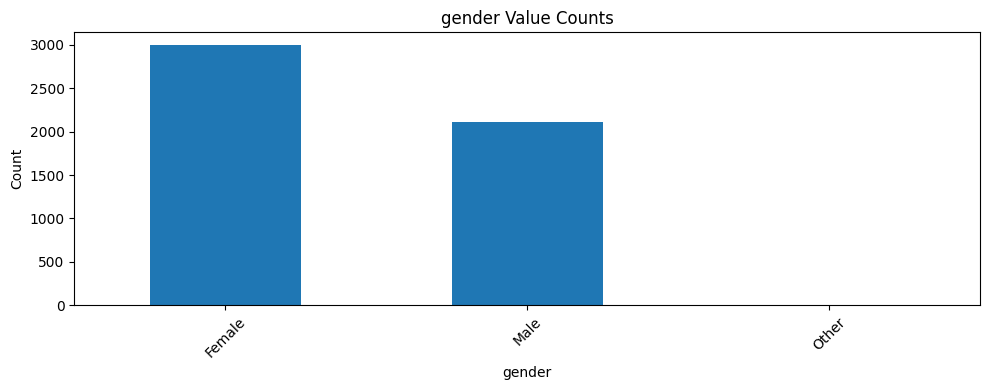

--------------------------------------------------

--- Analyzing age ---
AGE
Type: float64
Missing values: 0
Unique values: 104
Mean: 43.23
Median: 45.00
Standard deviation: 22.61
Min: 0.08
Max: 82.00


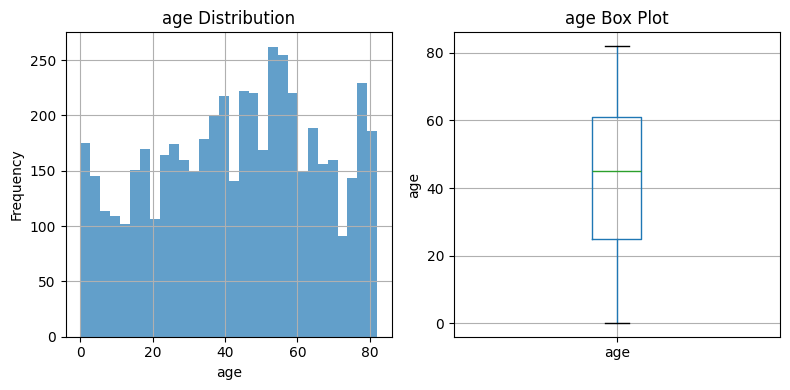

--------------------------------------------------

--- Analyzing hypertension ---
HYPERTENSION
Type: int64
Missing values: 0
Unique values: 2
Mean: 0.10
Median: 0.00
Standard deviation: 0.30
Min: 0.00
Max: 1.00


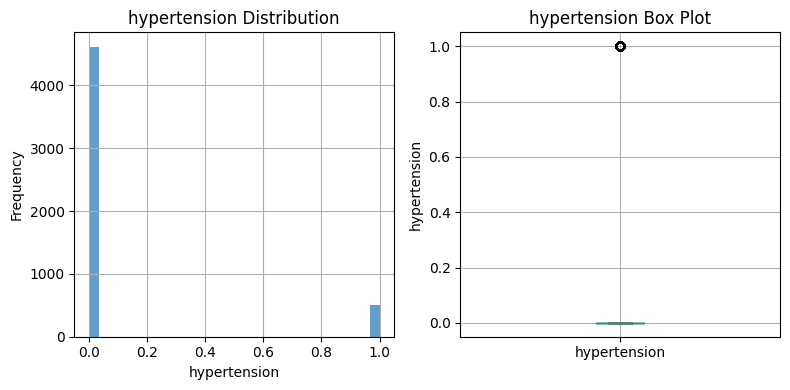

--------------------------------------------------

--- Analyzing heart_disease ---
HEART_DISEASE
Type: int64
Missing values: 0
Unique values: 2
Mean: 0.05
Median: 0.00
Standard deviation: 0.23
Min: 0.00
Max: 1.00


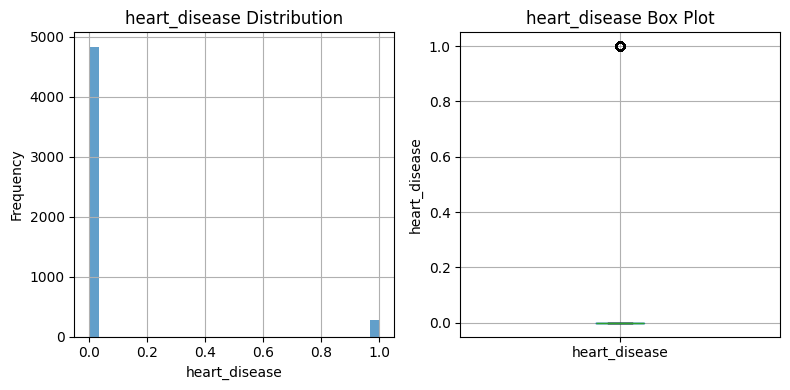

--------------------------------------------------

--- Analyzing ever_married ---
EVER_MARRIED
Type: object
Missing values: 0
Unique values: 2
Value counts:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64


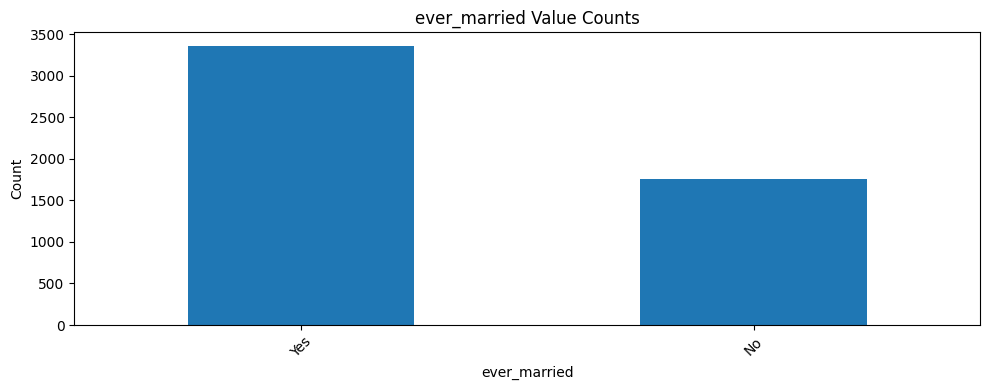

--------------------------------------------------

--- Analyzing work_type ---
WORK_TYPE
Type: object
Missing values: 0
Unique values: 5
Value counts:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


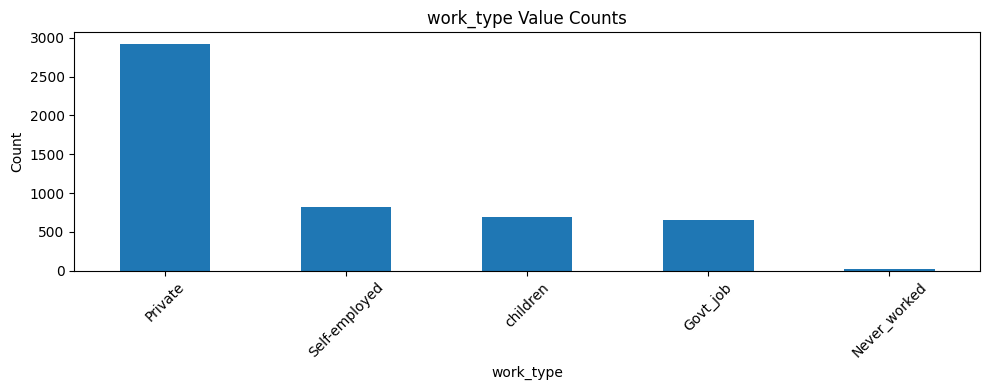

--------------------------------------------------

--- Analyzing Residence_type ---
RESIDENCE_TYPE
Type: object
Missing values: 0
Unique values: 2
Value counts:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


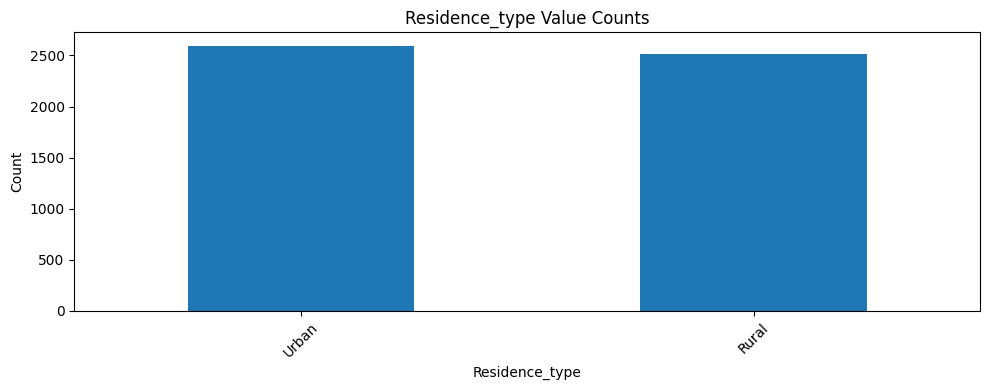

--------------------------------------------------

--- Analyzing avg_glucose_level ---
AVG_GLUCOSE_LEVEL
Type: float64
Missing values: 0
Unique values: 3979
Mean: 106.15
Median: 91.88
Standard deviation: 45.28
Min: 55.12
Max: 271.74


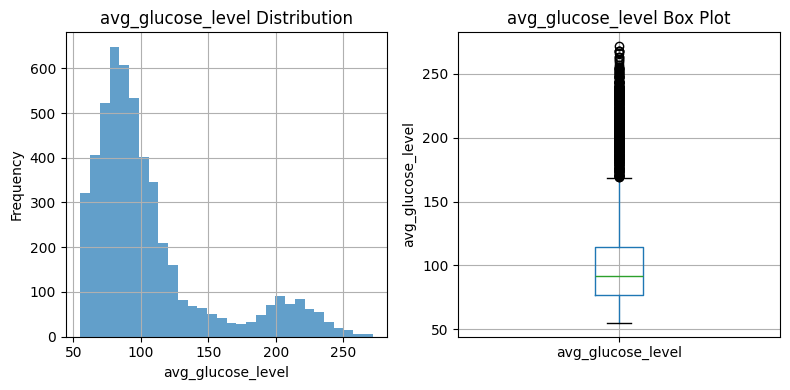

--------------------------------------------------

--- Analyzing bmi ---
BMI
Type: float64
Missing values: 201
Unique values: 418
Mean: 28.89
Median: 28.10
Standard deviation: 7.85
Min: 10.30
Max: 97.60


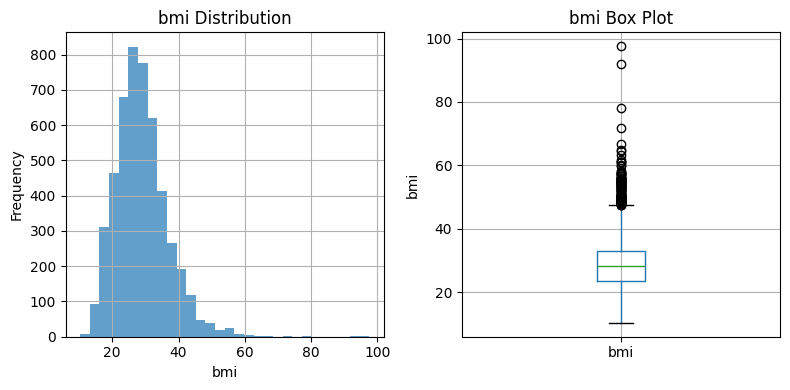

--------------------------------------------------

--- Analyzing smoking_status ---
SMOKING_STATUS
Type: object
Missing values: 0
Unique values: 4
Value counts:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


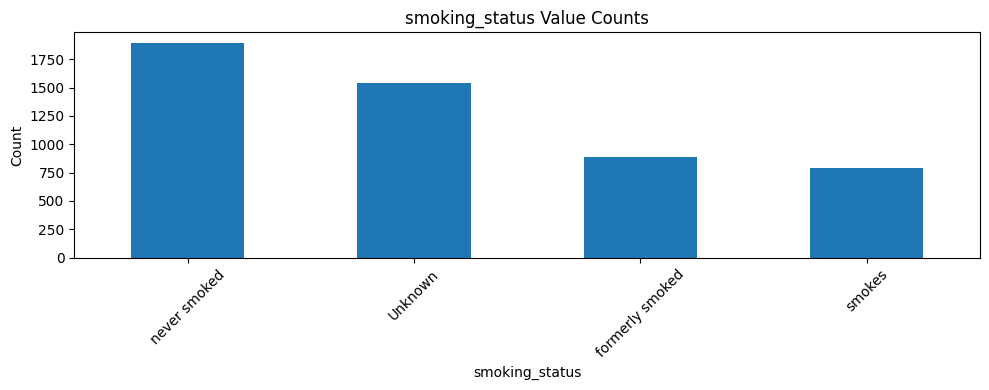

--------------------------------------------------

--- Analyzing stroke ---
STROKE
Type: int64
Missing values: 0
Unique values: 2
Mean: 0.05
Median: 0.00
Standard deviation: 0.22
Min: 0.00
Max: 1.00


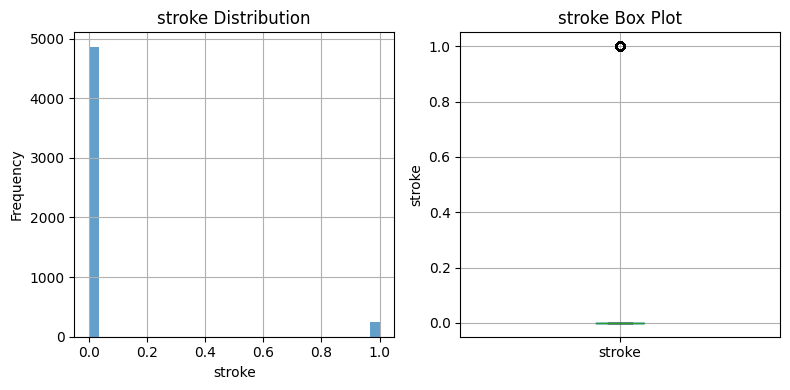

--------------------------------------------------


In [9]:
def univariate_analysis(column):
    print(f"{column.upper()}")
    print(f"Type: {df[column].dtype}")
    print(f"Missing values: {df[column].isnull().sum()}")
    print(f"Unique values: {df[column].nunique()}")
        
    if column in numerical_cols:
        print(f"Mean: {df[column].mean():.2f}")
        print(f"Median: {df[column].median():.2f}")
        print(f"Standard deviation: {df[column].std():.2f}")
        print(f"Min: {df[column].min():.2f}")
        print(f"Max: {df[column].max():.2f}")
        
        # Create histogram for numerical variables
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        df[column].hist(bins=30, alpha=0.7)
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
        # Create box plot
        plt.subplot(1, 2, 2)
        df.boxplot(column=column)
        plt.title(f'{column} Box Plot')
        plt.ylabel(column)
        
        plt.tight_layout()
        plt.show()
        
    else:
        # Categorical variables
        print("Value counts:")
        value_counts = df[column].value_counts()
        print(value_counts)
        
        # Create bar plot for categorical variables
        plt.figure(figsize=(10, 4))
        value_counts.plot(kind='bar')
        plt.title(f'{column} Value Counts')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    print("-" * 50)

# Apply univariate analysis to all columns except 'id' in the cleaned dataset
for col in df.columns:
    if col != 'id':
        print(f"\n--- Analyzing {col} ---")
        univariate_analysis(col)

**Observations**

- 'hypertension', 'heart_disease' and 'stroke' are encoded categorical column
- no informations given by 'id' so can be removed


In [10]:
numerical_cols = ['age','avg_glucose_level','bmi']
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','hypertension', 'heart_disease', 'stroke']

print(numerical_cols)
print(categorical_cols)

['age', 'avg_glucose_level', 'bmi']
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']


### Bivariate analysis

## Bivariate Analysis

This section explores relationships between pairs of variables, particularly focusing on how different features relate to the target variable (stroke). The analysis helps identify which factors are most strongly associated with stroke risk.

### Analysis Methods

The bivariate analysis includes:
- **Numerical vs Target**: Box plots showing distribution of numerical variables by stroke status
- **Categorical vs Target**: Bar charts showing stroke rates across different categories
- **Correlation Analysis**: Heatmaps showing relationships between numerical variables
- **Scatter Plots**: Visualizing relationships between key variables

### Key Relationships

The bivariate analysis reveals important associations:
- **Age and Stroke**: Strong positive correlation with stroke risk
- **Medical Conditions**: Hypertension and heart disease show clear associations
- **Lifestyle Factors**: Smoking status and work type variations in stroke rates
- **Biometric Factors**: BMI and glucose levels relationship with stroke risk


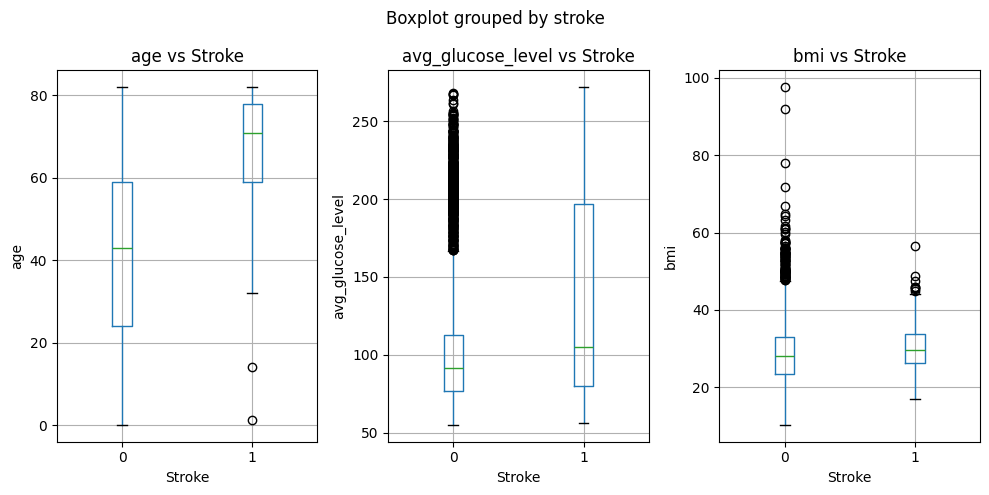

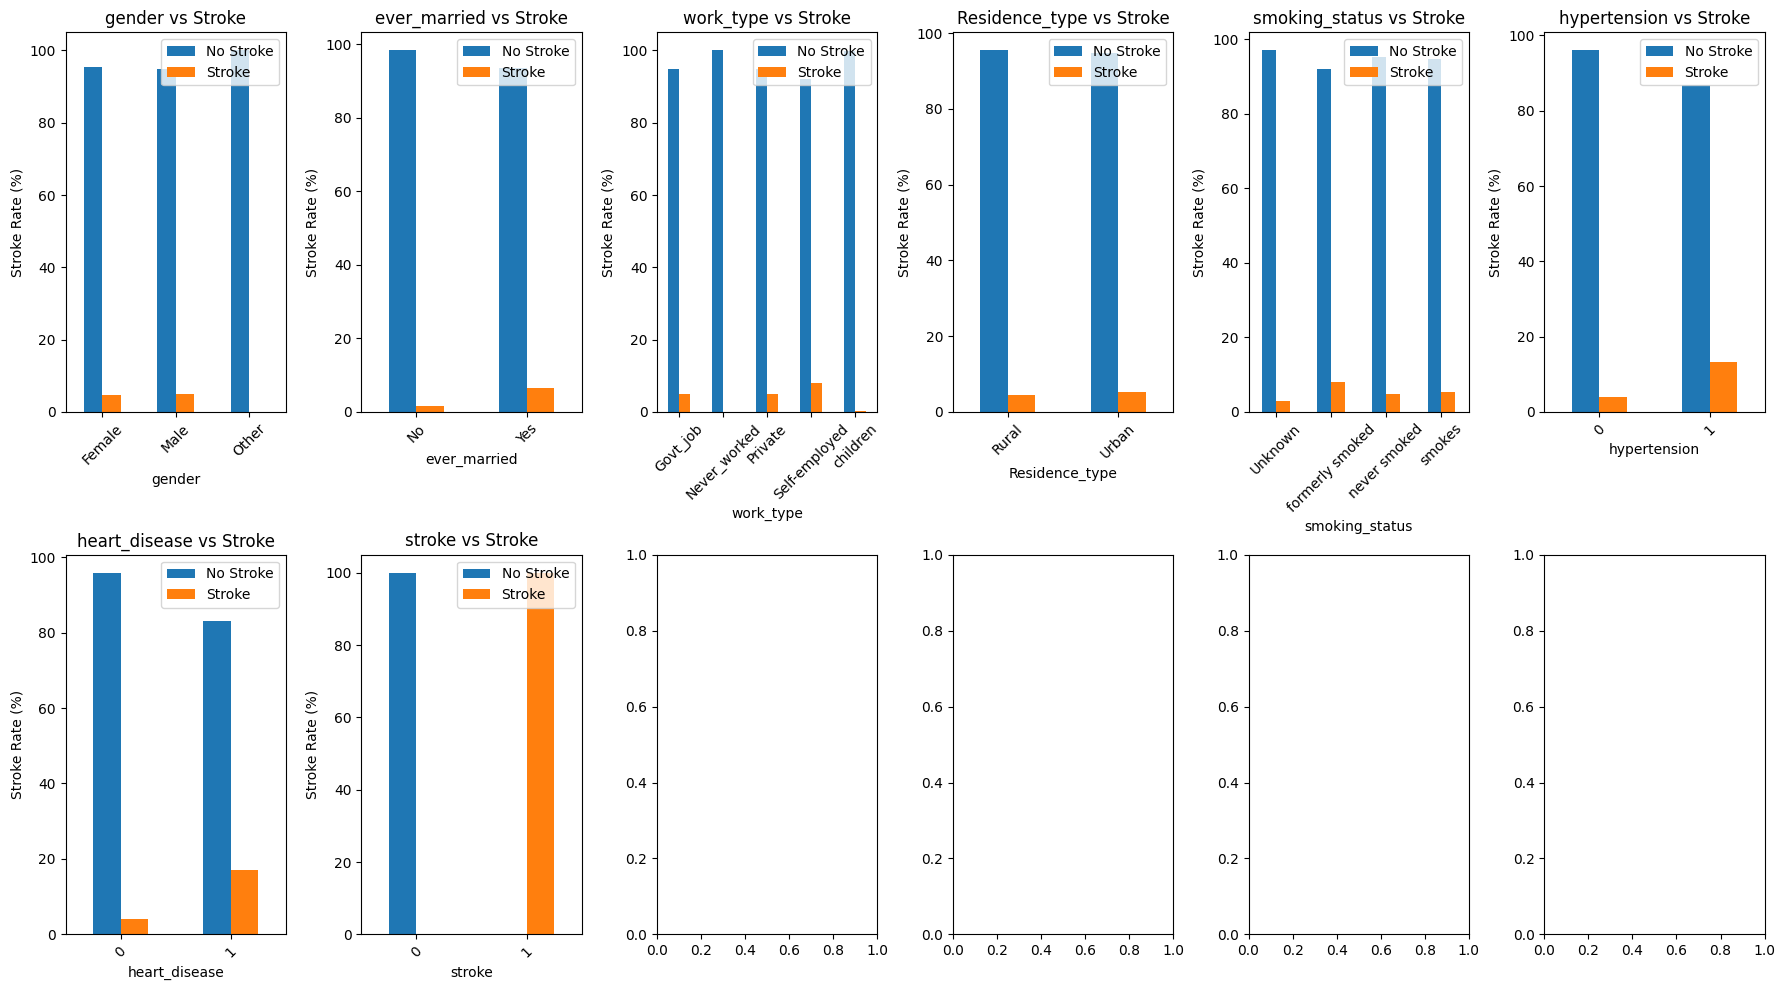


=== CORRELATION MATRIX ===


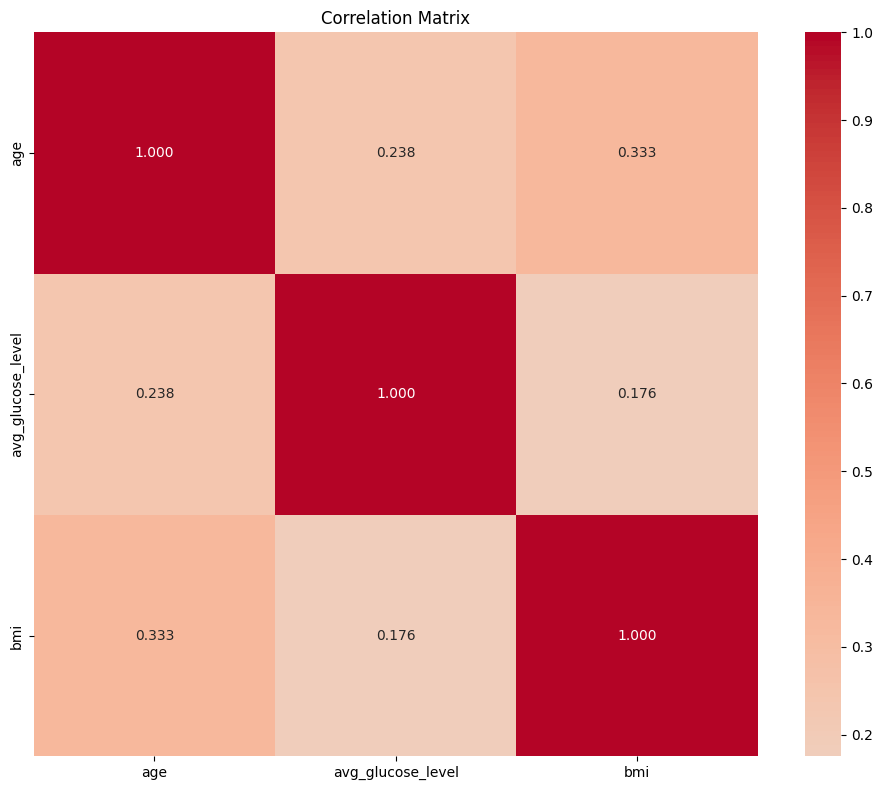

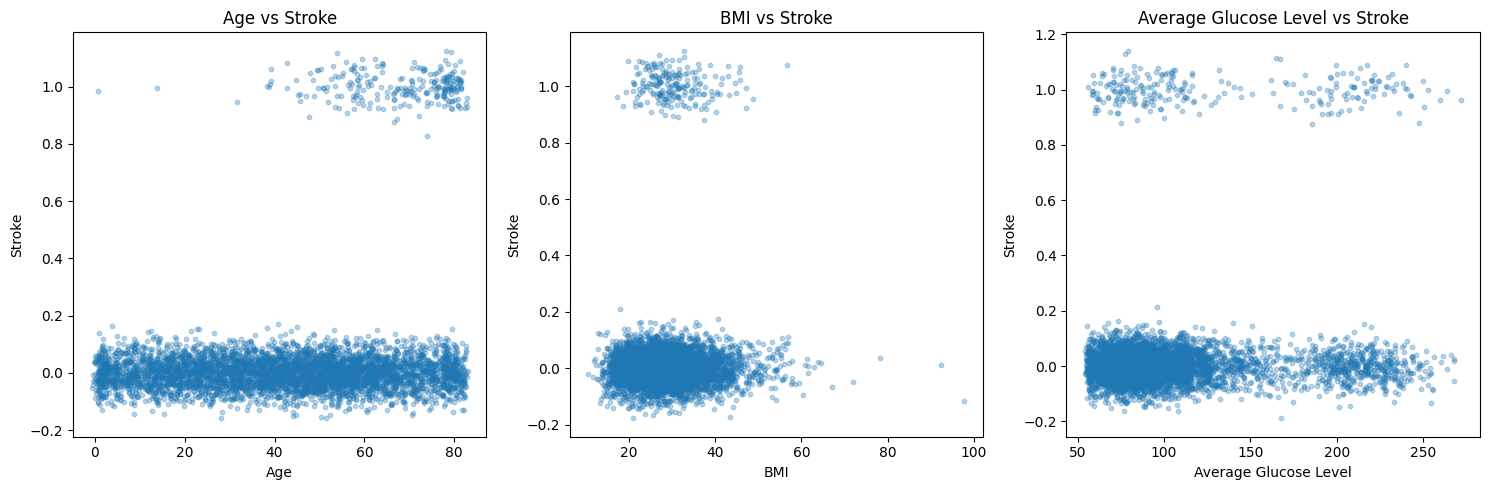


=== SUMMARY STATISTICS BY STROKE STATUS ===

age by stroke status:
         count       mean        std   min   25%   50%   75%   max
stroke                                                            
0       4861.0  41.971545  22.291940  0.08  24.0  43.0  59.0  82.0
1        249.0  67.728193  12.727419  1.32  59.0  71.0  78.0  82.0

avg_glucose_level by stroke status:
         count        mean        std    min    25%     50%     75%     max
stroke                                                                     
0       4861.0  104.795513  43.846069  55.12  77.12   91.47  112.83  267.76
1        249.0  132.544739  61.921056  56.11  79.79  105.22  196.71  271.74

bmi by stroke status:
         count       mean       std   min   25%   50%   75%   max
stroke                                                           
0       4700.0  28.823064  7.908287  10.3  23.4  28.0  33.1  97.6
1        209.0  30.471292  6.329452  16.9  26.4  29.7  33.7  56.6


In [12]:

# 1. Box plots for numerical variables vs stroke
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes = axes.ravel()

for i, var in enumerate(numerical_cols):
    if var in df.columns:  # Check if column exists
        # Box plot: numerical variable vs stroke
        df.boxplot(column=var, by='stroke', ax=axes[i])
        axes[i].set_title(f'{var} vs Stroke')
        axes[i].set_xlabel('Stroke')
        axes[i].set_ylabel(var)
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# 2. Bar charts for categorical variables vs stroke
fig, axes = plt.subplots(2, 6, figsize=(18, 10))
axes = axes.ravel()

for i, var in enumerate(categorical_cols):
    if i < len(axes) and var in df.columns:  # Check if column exists
        # Cross-tabulation
        crosstab = pd.crosstab(df[var], df['stroke'], normalize='index') * 100
        
        # Create bar chart
        crosstab.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{var} vs Stroke')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Stroke Rate (%)')
        axes[i].legend(['No Stroke', 'Stroke'])
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# 3. Correlation matrix
print("\n=== CORRELATION MATRIX ===")
# Only include numerical columns that exist in the dataset
available_numerical_cols = [col for col in numerical_cols if col in df.columns]
if available_numerical_cols:
    correlation_matrix = df[available_numerical_cols].corr()
    
    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.3f')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns available for correlation analysis")

# 4. Scatter plots for key relationships
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Age vs Stroke
if 'age' in df.columns:
    axes[0].scatter(df['age'] + np.random.normal(0, 0.5, len(df)), 
                    df['stroke'] + np.random.normal(0, 0.05, len(df)), 
                    alpha=0.3, s=10)
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('Stroke')
    axes[0].set_title('Age vs Stroke')
else:
    axes[0].set_visible(False)

# BMI vs Stroke
if 'bmi' in df.columns:
    axes[1].scatter(df['bmi'] + np.random.normal(0, 0.5, len(df)), 
                    df['stroke'] + np.random.normal(0, 0.05, len(df)), 
                    alpha=0.3, s=10)
    axes[1].set_xlabel('BMI')
    axes[1].set_ylabel('Stroke')
    axes[1].set_title('BMI vs Stroke')
else:
    axes[1].set_visible(False)

# Average Glucose Level vs Stroke
if 'avg_glucose_level' in df.columns:
    axes[2].scatter(df['avg_glucose_level'] + np.random.normal(0, 0.5, len(df)), 
                    df['stroke'] + np.random.normal(0, 0.05, len(df)), 
                    alpha=0.3, s=10)
    axes[2].set_xlabel('Average Glucose Level')
    axes[2].set_ylabel('Stroke')
    axes[2].set_title('Average Glucose Level vs Stroke')
else:
    axes[2].set_visible(False)

plt.tight_layout()
plt.show()

# 5. Summary statistics for numerical variables by stroke status
print("\n=== SUMMARY STATISTICS BY STROKE STATUS ===")
for var in available_numerical_cols:
    print(f"\n{var} by stroke status:")
    print(df.groupby('stroke')[var].describe())


**Observations**

- Based on the bar chart we can deduce than 'Gender' and 'Residence_type' have no impact on stroke parameter

## Multivariate Analysis

This section examines complex interactions between multiple variables simultaneously. The analysis helps identify patterns that might not be apparent when looking at variables individually or in pairs.

### Analysis Approach

The multivariate analysis includes:
- **Interaction Effects**: How combinations of risk factors influence stroke probability
- **Age-Risk Factor Interactions**: How age modifies the effect of other risk factors
- **Medical Condition Combinations**: Joint effects of hypertension, heart disease, and other conditions
- **Lifestyle and Medical Interactions**: How lifestyle factors interact with medical conditions

### Key Patterns

The multivariate analysis reveals important insights:
- **Age as a Modifier**: Age amplifies the effect of other risk factors
- **Risk Factor Combinations**: Multiple risk factors show synergistic effects
- **Protective Factors**: Some combinations may provide protection against stroke
- **High-Risk Profiles**: Identification of patient subgroups with highest stroke risk
